In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Stock List
bist = ["AEFES.IS", "AGHOL.IS", "AHGAZ.IS", "AKBNK.IS", "AKCNS.IS", "AKFGY.IS", "AKFYE.IS", "AKSA.IS",  "AKSEN.IS", "ALARK.IS", "ALBRK.IS", "ALFAS.IS", "ARCLK.IS", "ASELS.IS", "ASTOR.IS", "BERA.IS",
        "BIENY.IS", "BIMAS.IS", "BRSAN.IS", "BRYAT.IS", "BUCIM.IS", "CANTE.IS", "CCOLA.IS", "CIMSA.IS", "CWENE.IS", "DOAS.IS",  "DOHOL.IS", "ECILC.IS", "ECZYT.IS", "EGEEN.IS", "ENJSA.IS", "ENKAI.IS",
        "EREGL.IS", "EUPWR.IS", "EUREN.IS", "FROTO.IS", "GARAN.IS", "GENIL.IS", "GESAN.IS", "GLYHO.IS", "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "IMASM.IS", "IPEKE.IS", "ISCTR.IS", "ISDMR.IS",
        "ISMEN.IS", "IZMDC.IS", "KARSN.IS", "KAYSE.IS", "KCAER.IS", "KCHOL.IS", "KMPUR.IS", "KONTR.IS", "KONYA.IS", "KORDS.IS", "KOZAA.IS", "KOZAL.IS", "KRDMD.IS", "KZBGY.IS", "MAVI.IS",  "MGROS.IS", 
        "MIATK.IS",  "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "PENTA.IS", "PETKM.IS", "PGSUS.IS", "QUAGR.IS", "SAHOL.IS", "SASA.IS",  "SISE.IS",  "SKBNK.IS", "SMRTG.IS", "SOKM.IS",  "TAVHL.IS", "TCELL.IS", 
        "THYAO.IS", "TKFEN.IS", "TOASO.IS", "TSKB.IS",  "TTKOM.IS", "TTRAK.IS", "TUKAS.IS", "TUPRS.IS", "ULKER.IS", "VAKBN.IS", "VESBE.IS", "YEOTK.IS", "YKBNK.IS", "YYLGD.IS", "ZOREN.IS"]
len(bist)

94

In [3]:
stock_data = []
for stocks in bist:
    ticker = yf.Ticker(stocks)
    stock_info = ticker.info
    data = {key: stock_info.get(key, None) for key in ["symbol", "priceToBook", "currentPrice", "targetHighPrice", "targetLowPrice", "targetMeanPrice","targetMedianPrice",
                                                        "bookValue", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "open", "dayLow", "dayHigh", "recommendationKey"]}
    stock_data.append(data)
    df = pd.DataFrame(stock_data)


In [4]:
    
df["change"]        =           ((df["currentPrice"]/df["open"])-1)*100
df['How Far Median'] =          ((df["targetMedianPrice"]/df["currentPrice"])-1)*100
df["How Far targetHighPrice"] = ((df["targetHighPrice"]/df["currentPrice"])-1)*100
df["How Far targetLowPrice"]  = ((df["currentPrice"]/df["targetLowPrice"])-1)*100
df["How Far targetMeanPrice"] = ((df["currentPrice"]/df["targetMeanPrice"])-1)*100
df["Potantial"]     =           ((df["targetHighPrice"]-df["targetMeanPrice"])/df["currentPrice"])*100

In [5]:
daily_df = df[abs(df["change"])>=1]
daily_trade = daily_df.sort_values(by="change",ascending=False)
daily_trade.head(15)


,symbol,priceToBook,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,bookValue,fiftyTwoWeekLow,fiftyTwoWeekHigh,open,dayLow,dayHigh,recommendationKey,change,How Far Median,How Far targetHighPrice,How Far targetLowPrice,How Far targetMeanPrice,Potantial
49,KARSN.IS,2.424915,16.39,NaN,NaN,NaN,NaN,6.759,7.92,16.39,14.84,14.76,16.39,none,10.444744,NaN,NaN,NaN,NaN,NaN
60,KZBGY.IS,0.801272,24.70,NaN,NaN,NaN,NaN,30.826,16.46,28.58,23.34,23.34,25.00,none,5.826907,NaN,NaN,NaN,NaN,NaN
0,AEFES.IS,1.897330,233.40,324.00,142.40,223.63,215.00,123.015,66.15,234.40,227.40,222.70,234.40,buy,2.638522,-7.883462,38.817481,63.904494,4.368824,43.003428
9,ALARK.IS,0.977171,105.00,183.44,116.78,148.81,147.50,107.453,73.55,145.40,102.70,102.70,105.20,buy,2.239533,40.476190,74.704762,-10.087344,-29.440226,32.980952
83,TTKOM.IS,1.540026,49.96,56.78,25.70,38.44,34.00,32.441,18.82,52.95,49.00,48.58,50.25,hold,1.959184,-31.945556,13.650921,94.396887,29.968783,36.709367
62,MGROS.IS,2.289712,538.00,690.24,430.00,541.46,535.00,234.964,212.50,539.50,529.00,527.50,539.50,buy,1.701323,-0.557621,28.297398,25.116279,-0.639013,27.654275
87,ULKER.IS,2.960101,171.60,241.00,89.00,152.39,140.00,57.971,33.80,174.40,168.90,167.60,174.40,buy,1.598579,-18.414918,40.442890,92.808989,12.605814,51.637529
15,BERA.IS,0.864265,18.93,NaN,NaN,NaN,NaN,21.903,10.33,22.76,18.67,18.61,19.22,none,1.392608,NaN,NaN,NaN,NaN,NaN
1,AGHOL.IS,1.165234,355.50,355.00,355.00,355.00,355.00,305.089,107.10,384.75,350.75,344.25,358.50,buy,1.354241,-0.140647,-0.140647,0.140845,0.140845,0.000000
51,KCAER.IS,4.575215,57.30,38.00,36.71,37.36,37.36,12.524,16.67,69.15,56.55,55.75,58.00,buy,1.326260,-34.799302,-33.682373,56.088259,53.372591,1.116928


In [6]:
df1 = df.drop(["open",],axis=1)
df2 = df1[["symbol",'priceToBook',"currentPrice","Potantial",'How Far Median' ,'targetHighPrice','targetLowPrice', 'targetMeanPrice', 'targetMedianPrice',"change","recommendationKey"]]
buy = df2.sort_values(by="How Far Median",ascending=False)
buy = buy[buy["recommendationKey"]=="buy"]
buy.head(50)

,symbol,priceToBook,currentPrice,Potantial,How Far Median,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,change,recommendationKey
23,CIMSA.IS,1.375172,30.02,17.288474,47.901399,50.50,41.94,45.31,44.40,-2.278646,buy
89,VESBE.IS,1.308633,20.98,22.735939,45.614871,34.33,23.81,29.56,30.55,-1.131008,buy
9,ALARK.IS,0.977171,105.00,32.980952,40.476190,183.44,116.78,148.81,147.50,2.239533,buy
4,AKCNS.IS,1.762592,144.70,25.874223,40.152039,237.00,155.64,199.56,202.80,-2.097429,buy
73,SISE.IS,0.760148,48.22,26.379096,36.043136,78.70,55.00,65.98,65.60,-0.863487,buy
76,SOKM.IS,1.519644,63.55,53.123525,32.336743,123.00,70.89,89.24,84.10,-1.319876,buy
8,AKSEN.IS,1.508560,44.32,7.829422,31.926895,61.94,55.00,58.47,58.47,0.818926,buy
79,THYAO.IS,26.459932,306.75,29.219234,28.932355,491.03,310.00,401.40,395.50,-1.207729,buy
10,ALBRK.IS,0.952302,5.75,0.000000,27.130435,7.31,7.31,7.31,7.31,-2.542373,buy
35,FROTO.IS,4.304709,1103.00,19.941976,23.739801,1578.90,975.00,1358.94,1364.85,1.192661,buy


In [7]:
df1["How Far targetLowPrice"]
hold = df1.sort_values(by="How Far targetLowPrice",ascending=True)
hold = hold[["symbol",'priceToBook',"currentPrice","How Far targetLowPrice",'targetHighPrice','targetLowPrice', 'targetMeanPrice', 'targetMedianPrice',"change","recommendationKey" ]]
hold = hold[hold["recommendationKey"]=="hold"]
hold

,symbol,priceToBook,currentPrice,How Far targetLowPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,change,recommendationKey
56,KORDS.IS,1.271820,91.95,-10.728155,113.09,103.00,109.62,112.76,-1.075847,hold
31,ENKAI.IS,33.778840,42.46,3.460039,51.54,41.04,44.98,43.99,0.425733,hold
57,KOZAA.IS,1.622975,55.10,17.258991,85.00,46.99,66.00,66.00,-1.165919,hold
30,ENJSA.IS,1.207537,65.30,20.925926,97.45,54.00,67.51,62.30,0.076628,hold
58,KOZAL.IS,3.335882,21.82,21.222222,32.00,18.00,24.50,24.00,-1.534296,hold
32,EREGL.IS,0.846020,52.35,33.104500,64.50,39.33,51.43,51.11,-1.690141,hold
80,TKFEN.IS,0.819941,55.05,45.059289,58.23,37.95,50.06,50.80,1.287948,hold
25,DOAS.IS,1.185327,279.25,56.882022,405.00,178.00,312.43,323.00,1.269266,hold
68,PETKM.IS,0.964796,21.76,57.681159,30.00,13.80,23.69,25.31,0.184162,hold
88,VAKBN.IS,1.268908,24.16,85.846154,31.36,13.00,19.71,19.00,-3.974563,hold


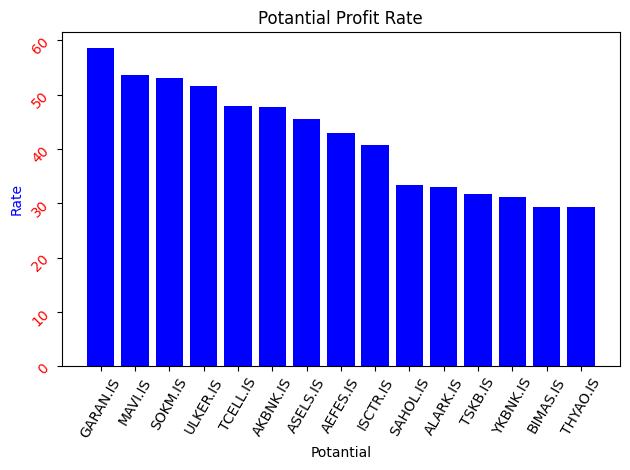

In [8]:
fig, ax1 = plt.subplots()
buy1 = buy.sort_values(by="Potantial", ascending=False)
top_10 = buy1.head(15)
ax1.set_xlabel("Potantial")
ax1.set_ylabel('Rate', color="blue")
ax1.bar(top_10["symbol"], top_10["Potantial"], color="blue") 
ax1.tick_params(axis='y', labelcolor="red",labelrotation = 45)
plt.xticks(rotation=60)

plt.title("Potantial Profit Rate")
fig.tight_layout()  
plt.show()

In [9]:
#THY Tupras SOKM SAHOL
Sise = (df1[df1.symbol == "SISE.IS"].currentPrice - 48.92) * 200
Sokm = (df1[df1.symbol == "SOKM.IS"].currentPrice - 60.05) * 333
now = datetime.now()
print(f"{now} Sisecam kar = {float(Sise)} Sok Market kar = {float(Sokm)}")

2024-06-25 15:33:53.175303 Sisecam kar = -140.00000000000057 Sok Market kar = 1165.5


C:\Users\Tolga\AppData\Local\Temp\ipykernel_16648\1996107031.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{now} Sisecam kar = {float(Sise)} Sok Market kar = {float(Sokm)}")


# Investing Charts

[*********************100%%**********************]  1 of 1 completed


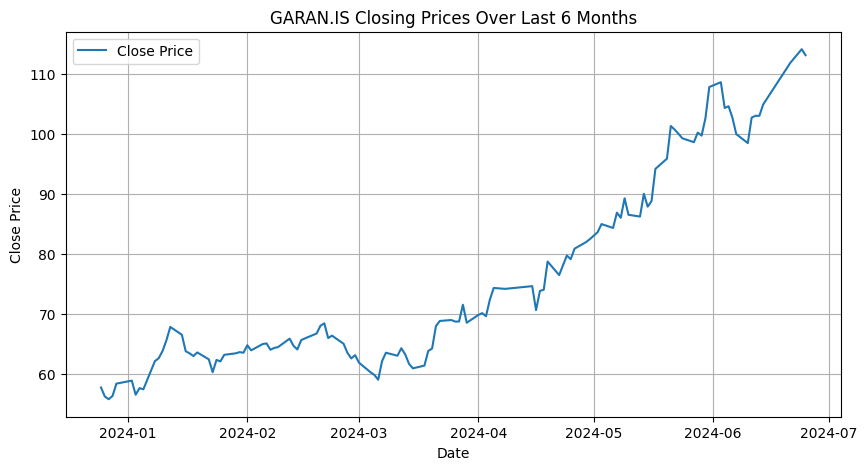

[*********************100%%**********************]  1 of 1 completed


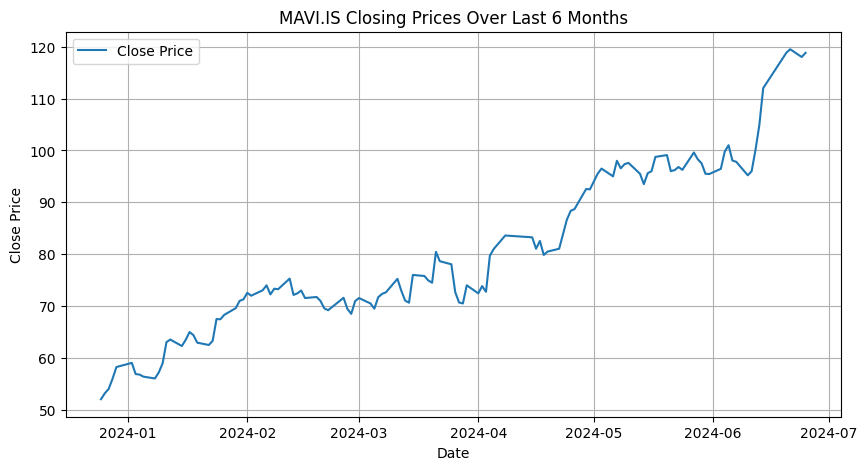

[*********************100%%**********************]  1 of 1 completed


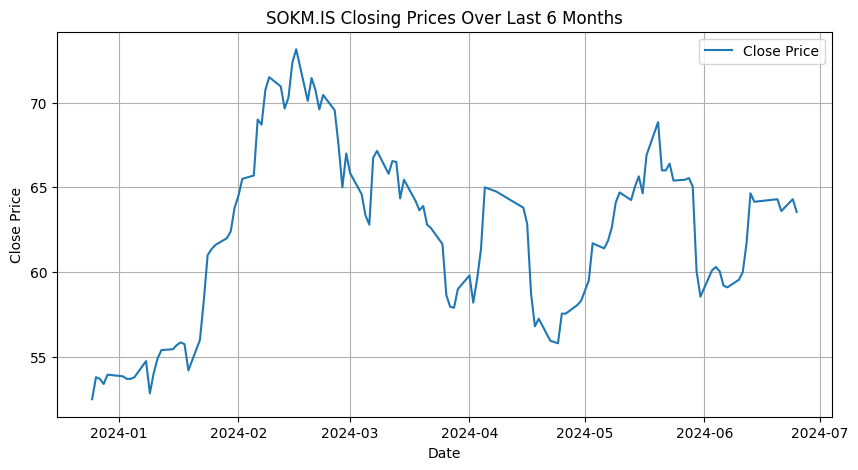

[*********************100%%**********************]  1 of 1 completed


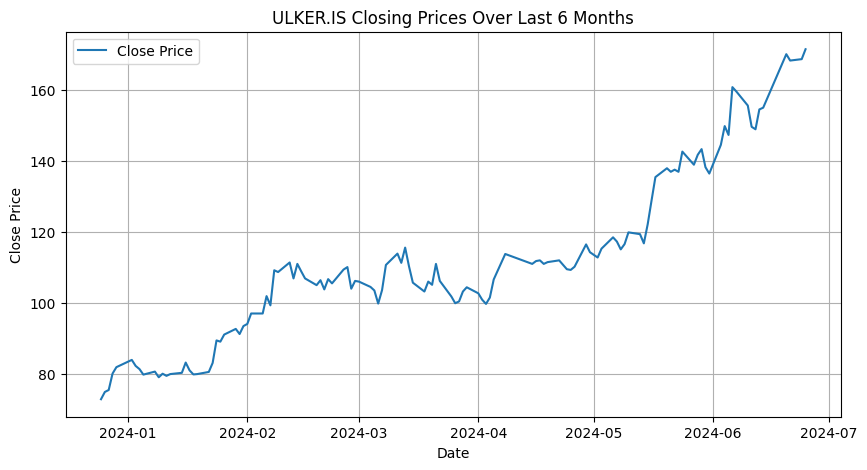

[*********************100%%**********************]  1 of 1 completed


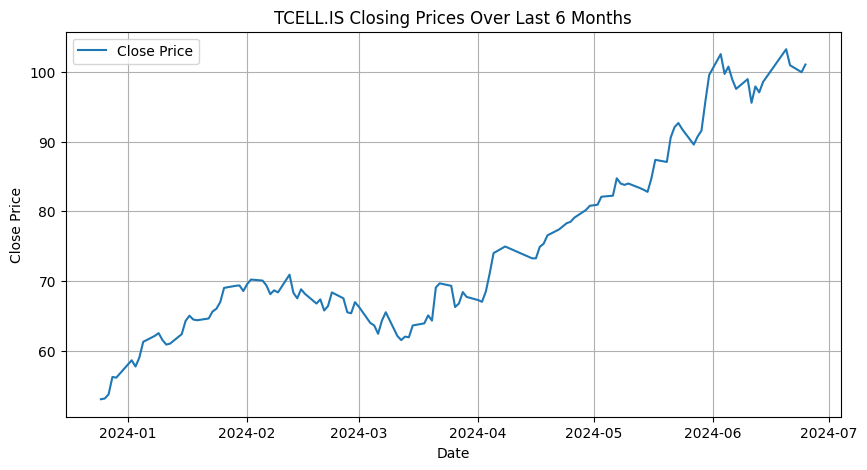

[*********************100%%**********************]  1 of 1 completed


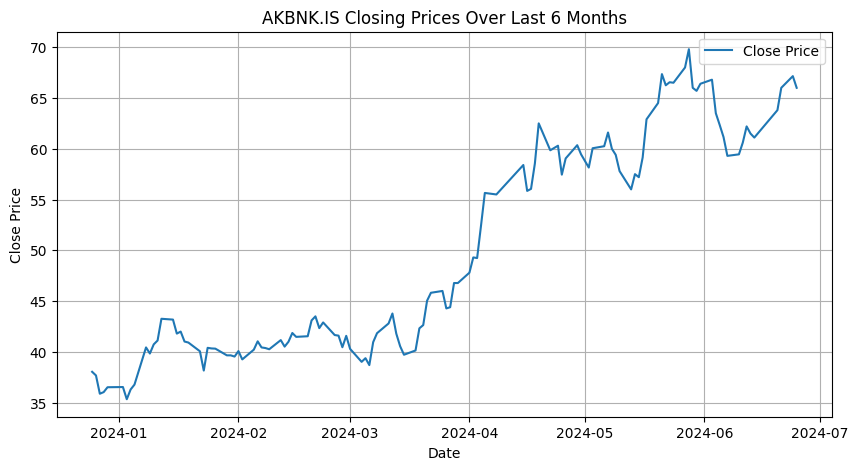

[*********************100%%**********************]  1 of 1 completed


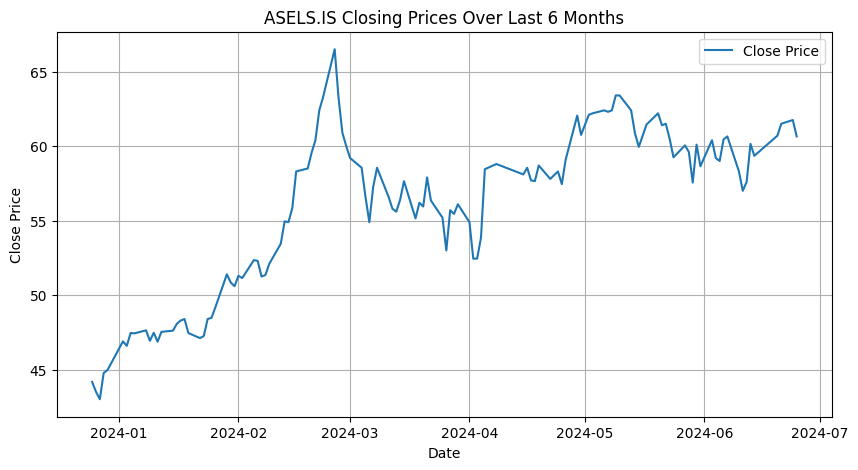

[*********************100%%**********************]  1 of 1 completed


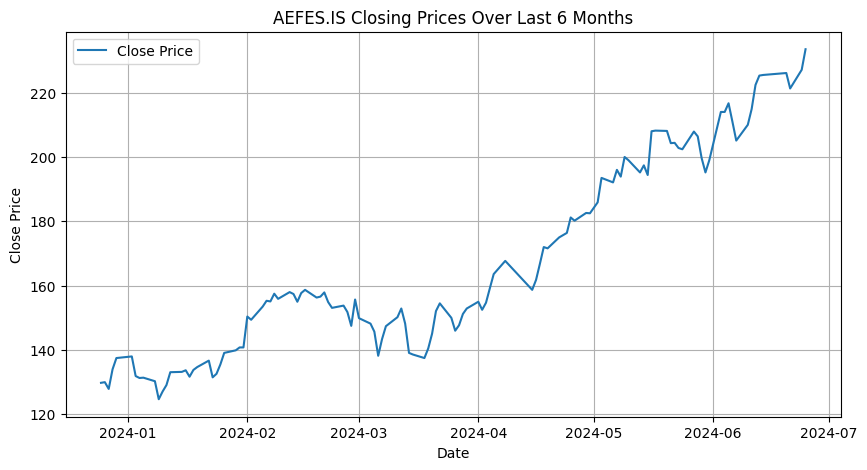

[*********************100%%**********************]  1 of 1 completed


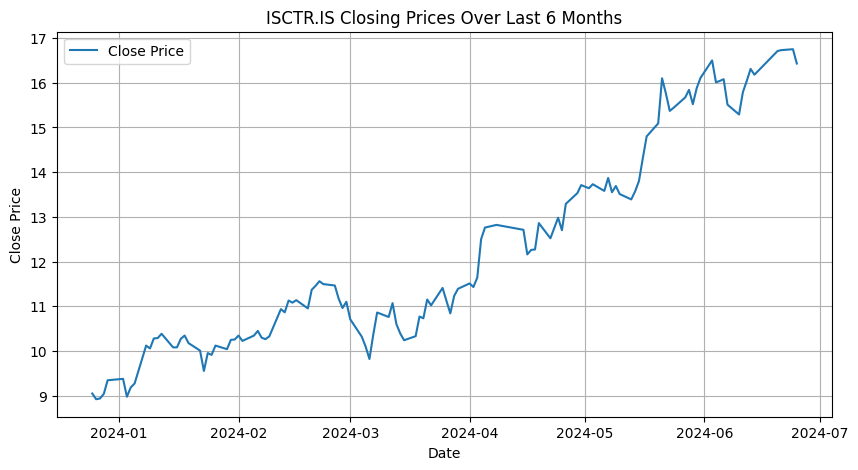

[*********************100%%**********************]  1 of 1 completed


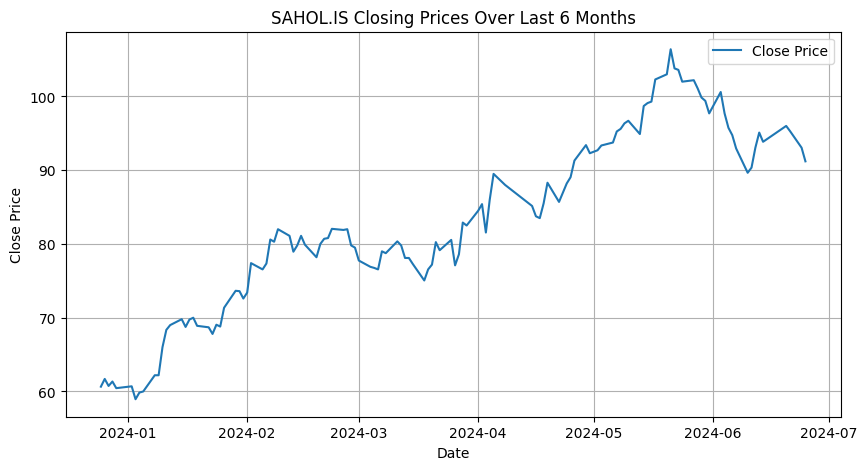

[*********************100%%**********************]  1 of 1 completed


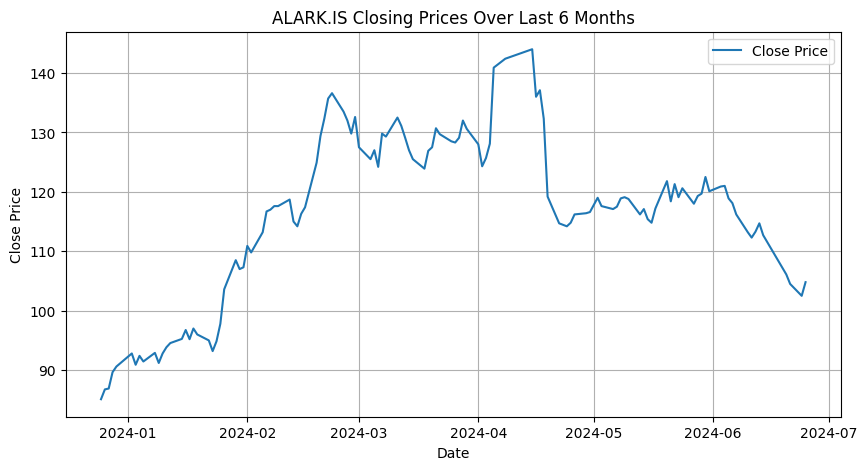

[*********************100%%**********************]  1 of 1 completed


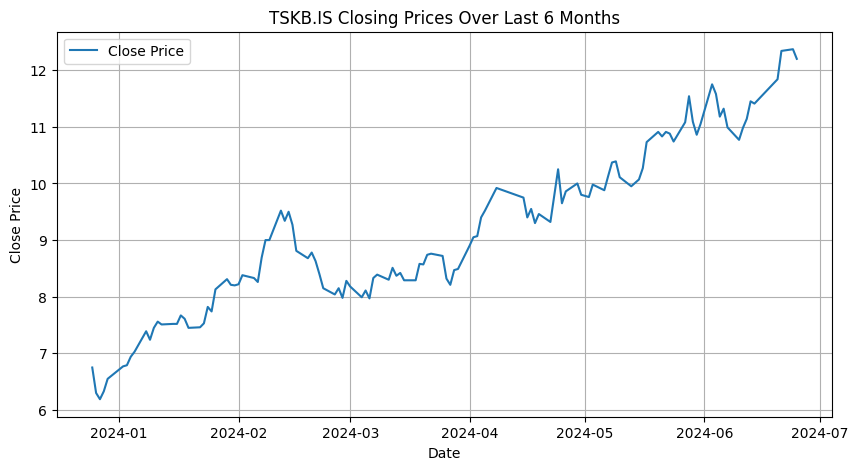

[*********************100%%**********************]  1 of 1 completed


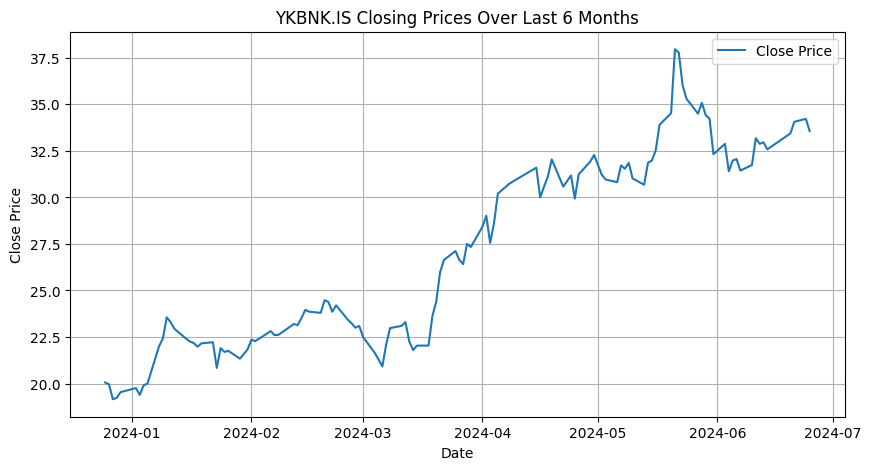

[*********************100%%**********************]  1 of 1 completed


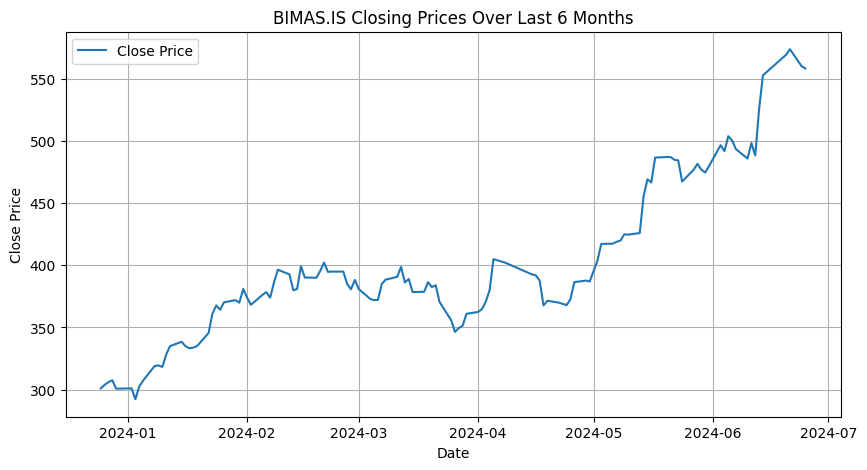

[*********************100%%**********************]  1 of 1 completed


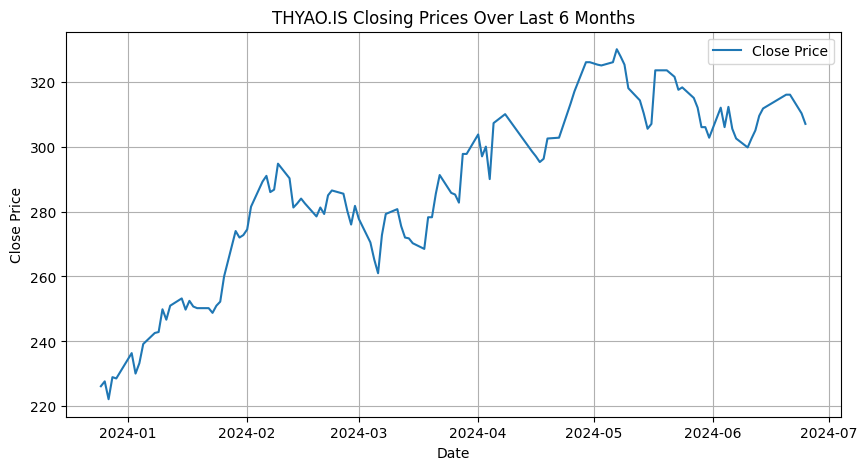

In [10]:
# Long Term Graphs
graph_list = top_10.symbol.unique()
for graph in graph_list:
    ticker = graph
    data = yf.download(ticker, period="6mo", interval="1d")
    data["Close"]
    closing_prices = data["Close"]
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices, label='Close Price')
    plt.title(f'{ticker} Closing Prices Over Last 6 Months')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Day Trading Charts

[*********************100%%**********************]  1 of 1 completed


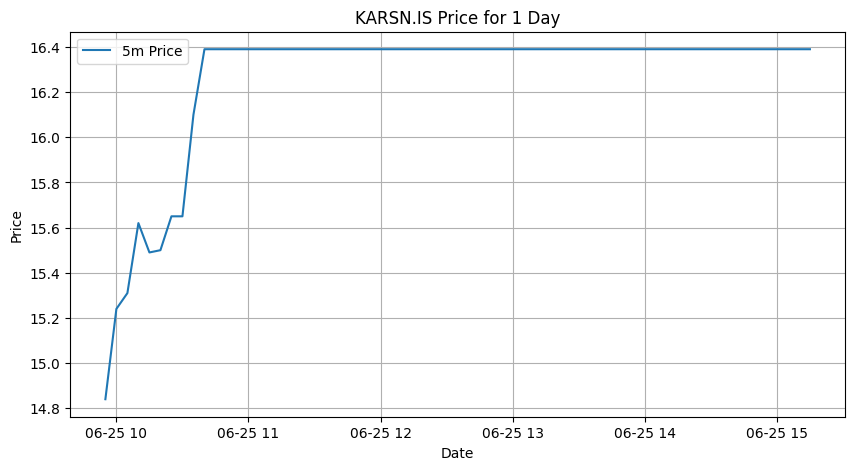

[*********************100%%**********************]  1 of 1 completed


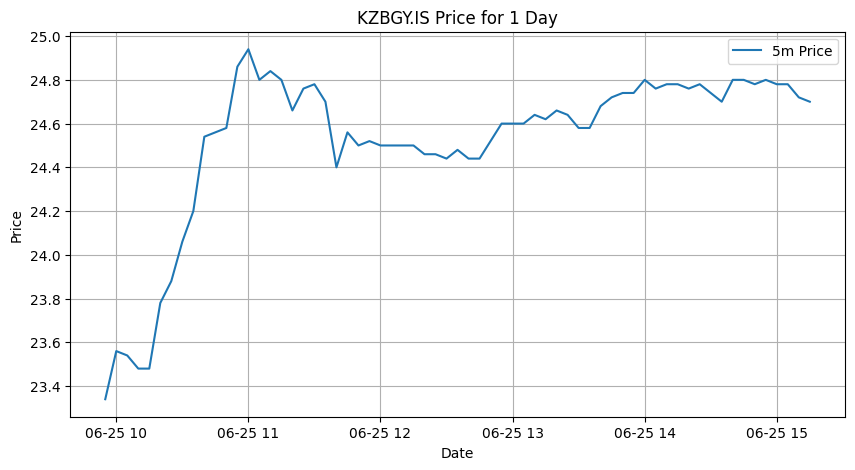

[*********************100%%**********************]  1 of 1 completed


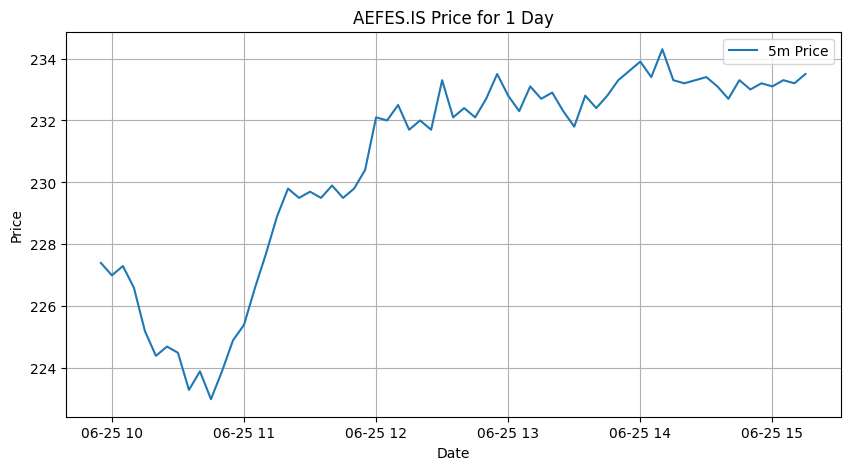

[*********************100%%**********************]  1 of 1 completed


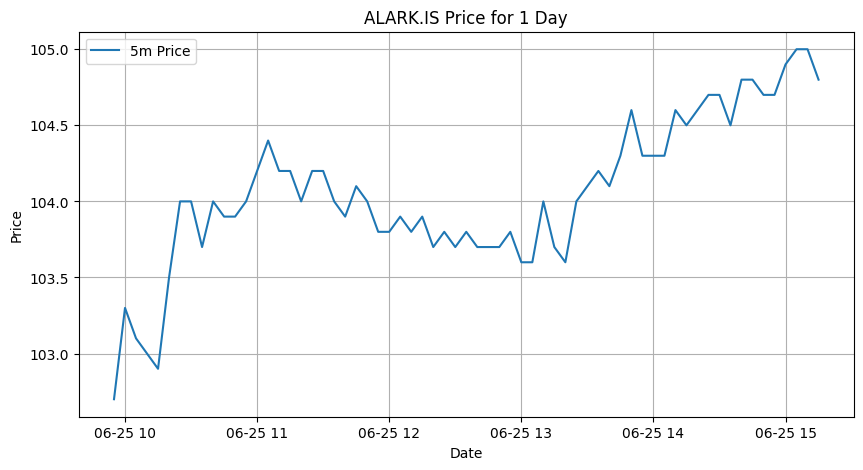

[*********************100%%**********************]  1 of 1 completed


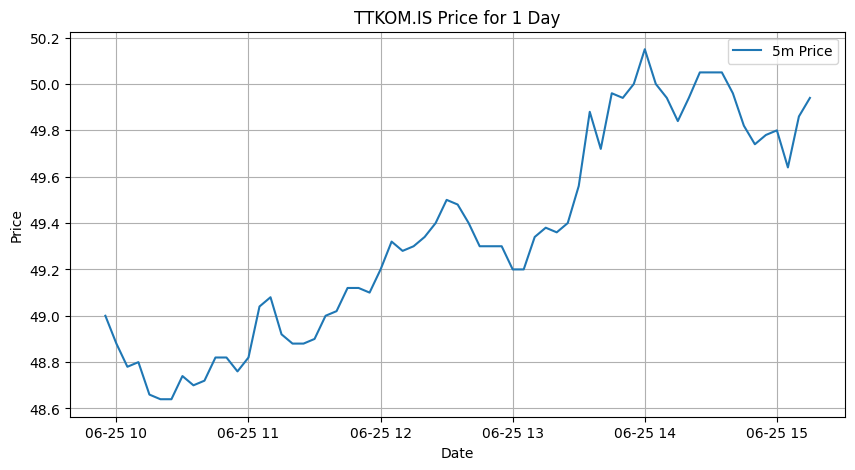

[*********************100%%**********************]  1 of 1 completed


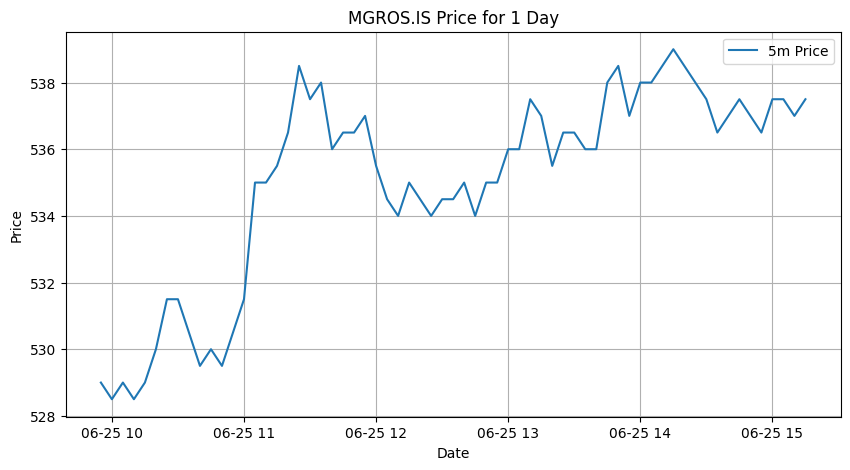

[*********************100%%**********************]  1 of 1 completed


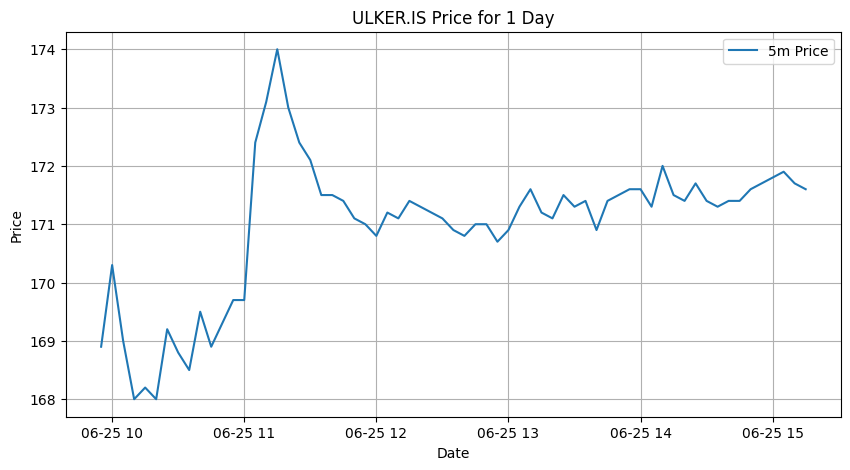

[*********************100%%**********************]  1 of 1 completed


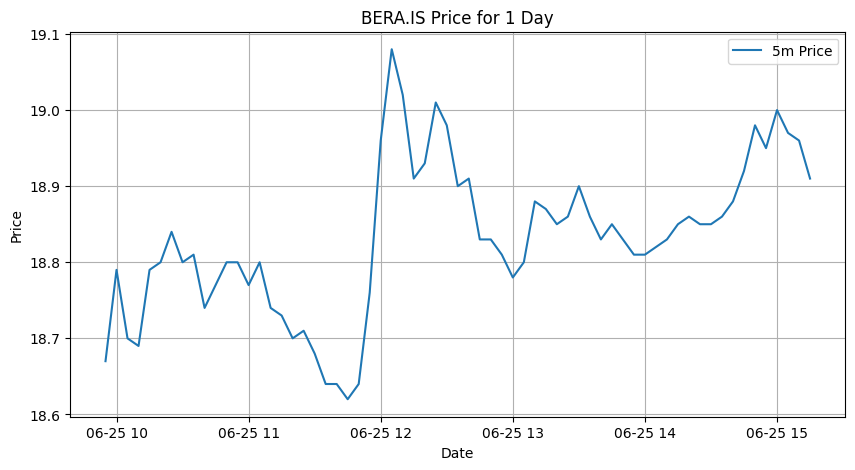

[*********************100%%**********************]  1 of 1 completed


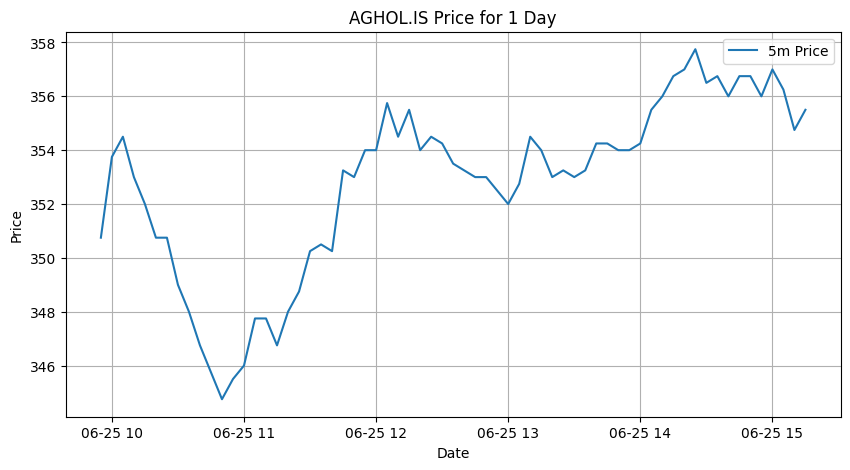

[*********************100%%**********************]  1 of 1 completed


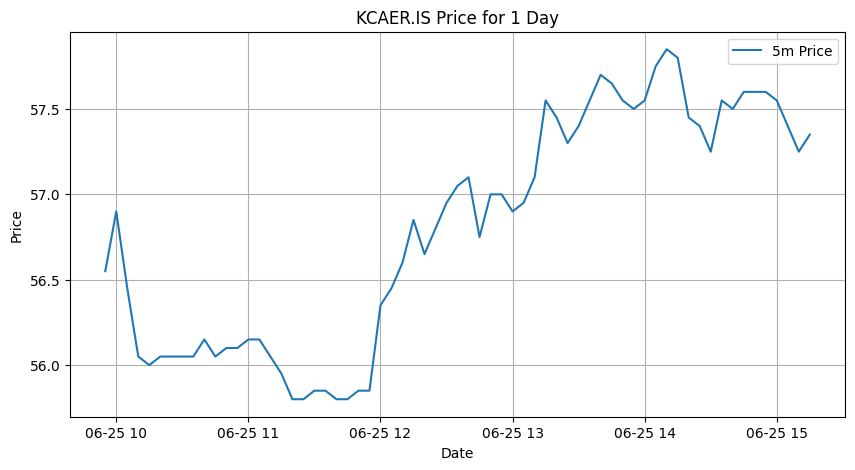

[*********************100%%**********************]  1 of 1 completed


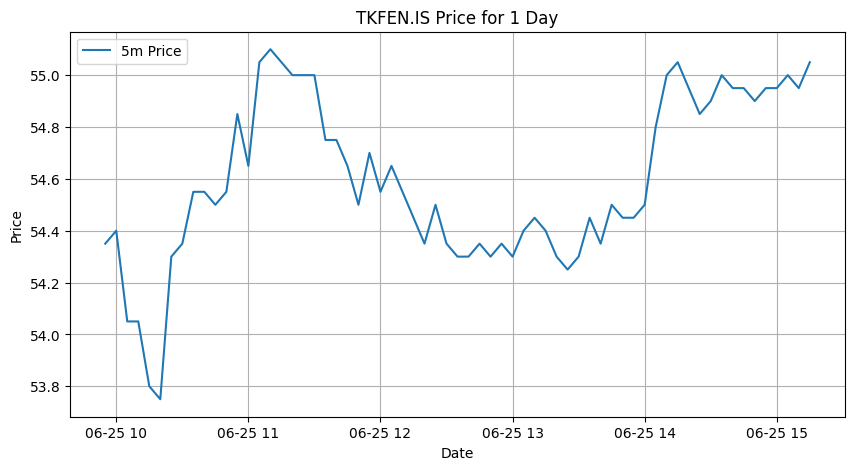

[*********************100%%**********************]  1 of 1 completed


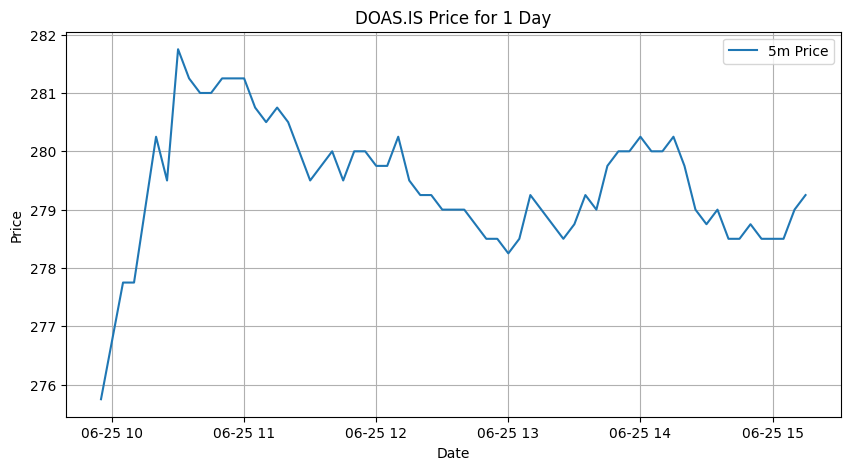

[*********************100%%**********************]  1 of 1 completed


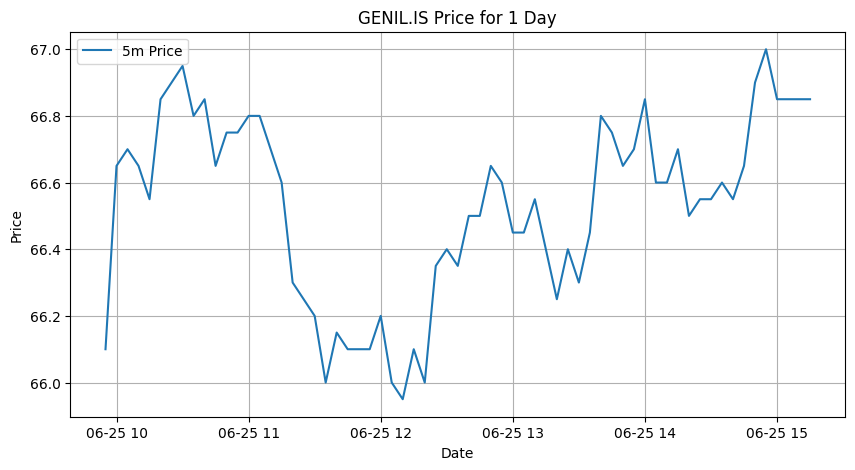

[*********************100%%**********************]  1 of 1 completed


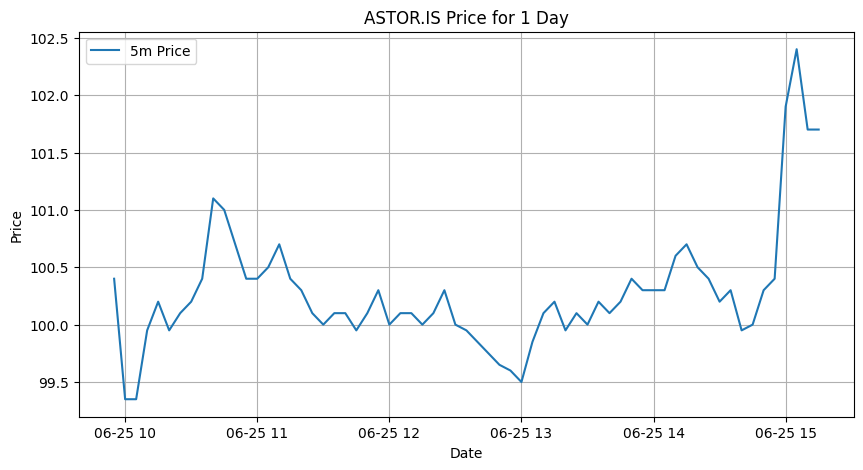

[*********************100%%**********************]  1 of 1 completed


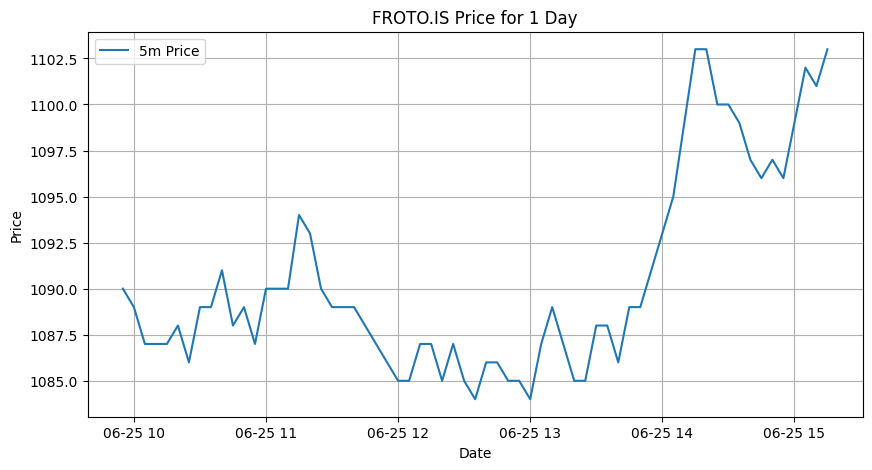

In [11]:
# Daily Graphs
daily_trade1 = daily_trade.head(15)
trade_list = daily_trade1.symbol.unique()
for trade in trade_list:
    ticker = trade
    data = yf.download(ticker, period="1d", interval="5m")
    data["Close"]
    closing_prices = data["Close"]
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices, label='5m Price')
    plt.title(f'{ticker} Price for 1 Day')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
